In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fifa = pd.read_csv("/Users/takaooba/Downloads/archive (2)/WorldCupMatches.csv")

In [3]:
fifa.shape

(4572, 20)

In [4]:
fifa = fifa.dropna()
fifa.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [5]:
fifa.shape

(850, 20)

In [6]:

temp = fifa.groupby(["Home Team Initials", "Away Team Initials"]).mean()
temp
temp2 = temp["Attendance"]

In [7]:
temp2 = pd.DataFrame(temp2)
temp2

Attendance
Home Team Initials Away Team Initials            
ALG                AUT                    22000.0
                   CHI                    16000.0
                   ESP                    23980.0
                   NIR                    22000.0
                   RUS                    39311.0
...                                           ...
YUG                UAE                    27833.0
                   URU                     8829.0
                   ZAI                    31700.0
ZAI                BRA                    36200.0
                   SCO                    27000.0

[660 rows x 1 columns]

In [8]:
temp3 = temp2.sort_values("Attendance", ascending = False)

In [9]:
temp4 = temp3.stack().reset_index()

In [10]:
temp4.drop("level_2", inplace = True, axis = 1)


In [11]:
temp4.set_axis(["Home Team Initials", "Away Team Initials", "Attendance"], axis = 1, inplace = True)

In [12]:
temp4

,Home Team Initials,Away Team Initials,Attendance
0,URU,BRA,173850.0
1,MEX,PAR,114600.0
2,MEX,BEL,108192.0
3,MEX,URS,107160.0
4,IRQ,MEX,103763.0
...,...,...,...
655,TUR,KOR,4000.0
656,SUI,MEX,3580.0
657,WAL,HUN,2823.0
658,ROU,PER,2549.0


In [13]:
temp4.loc[0:20, ]

,Home Team Initials,Away Team Initials,Attendance
0,URU,BRA,173850.000000
1,MEX,PAR,114600.000000
2,MEX,BEL,108192.000000
3,MEX,URS,107160.000000
4,IRQ,MEX,103763.000000
5,MEX,SLV,103058.000000
6,ENG,FRG,96924.000000
7,ITA,FRG,96222.000000
8,USA,COL,93869.000000
9,USA,ROU,93869.000000


In [14]:
#### by home team intiials


temp = fifa.groupby("Home Team Initials").mean()
temp
temp2 = temp["Attendance"]
temp2 = pd.DataFrame(temp2)
temp2
temp3 = temp2.sort_values("Attendance", ascending = False)
temp4 = temp3.stack().reset_index()
temp4.drop("level_1", inplace = True, axis = 1)
temp4


,Home Team Initials,0
0,UKR,72000.00
1,CAN,65500.00
2,ECU,65402.75
3,BOL,63089.00
4,TRI,62959.00
...,...,...
72,PRK,22128.00
73,PER,19498.20
74,TCH,16637.10
75,CUB,7500.00


In [15]:
temp4.set_axis(["Home Team Initials", "Attendance"], axis = 1, inplace = True)

In [16]:
temp4

,Home Team Initials,Attendance
0,UKR,72000.00
1,CAN,65500.00
2,ECU,65402.75
3,BOL,63089.00
4,TRI,62959.00
...,...,...
72,PRK,22128.00
73,PER,19498.20
74,TCH,16637.10
75,CUB,7500.00


In [17]:
temp5 = temp4.loc[0:20, ]
temp5

,Home Team Initials,Attendance
0,UKR,72000.000000
1,CAN,65500.000000
2,ECU,65402.750000
3,BOL,63089.000000
4,TRI,62959.000000
5,COL,61898.000000
6,IRQ,61881.500000
7,MEX,61445.625000
8,KSA,56003.166667
9,BRA,55365.475610


Text(0, 0.5, 'Average Number of Atendees')

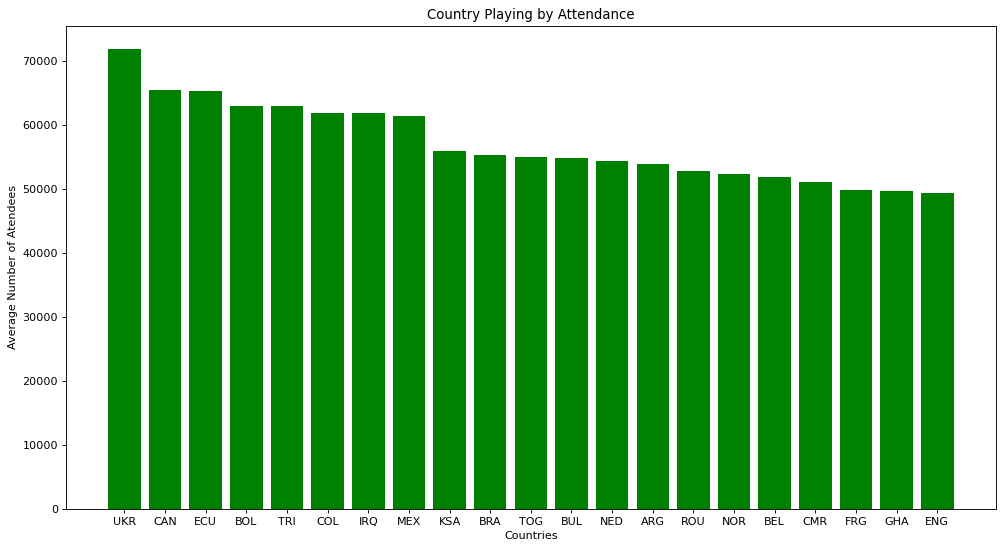

In [20]:
import matplotlib

matplotlib.pyplot.figure(figsize=(15, 8), dpi=80)
f = plt.bar(temp5["Home Team Initials"], temp5["Attendance"], color = "green")
plt.title("Country Playing by Attendance")
plt.xlabel("Countries")
plt.ylabel("Average Number of Atendees")


In [ ]:
# Now we look at how each country performed over the past world cups

In [22]:
wc = pd.read_csv('/Users/takaooba/Downloads/archive (2)/WorldCups.csv')

In [24]:
wc.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [25]:
# In this data frame, we see that we are able to see which countries performed the best in the columns "Winner", "Runners-Up", "Third", "Fourth"

In [26]:
# Denote "Winner" as gold medal, "Runners-Up" as silver medal, and "Third" as bronze, and "Fourth" as honorable

In [27]:
gold = wc["Winner"]
silver = wc["Runners-Up"]
bronze = wc["Third"]
honorary = wc["Fourth"]

In [34]:
count_gold = pd.DataFrame.from_dict(gold.value_counts())
count_silver = pd.DataFrame.from_dict(silver.value_counts())
count_bronze = pd.DataFrame.from_dict(bronze.value_counts())
count_honorary = pd.DataFrame.from_dict(honorary.value_counts())
print(count_gold)
print(count_silver)
print(count_bronze)
print(count_honorary)

            Winner
Brazil           5
Italy            4
Germany FR       3
Uruguay          2
Argentina        2
England          1
France           1
Spain            1
Germany          1
                Runners-Up
Argentina                3
Germany FR               3
Netherlands              3
Czechoslovakia           2
Hungary                  2
Brazil                   2
Italy                    2
Sweden                   1
Germany                  1
France                   1
             Third
Germany          3
Brazil           2
Sweden           2
France           2
Poland           2
USA              1
Austria          1
Chile            1
Portugal         1
Germany FR       1
Italy            1
Croatia          1
Turkey           1
Netherlands      1
                Fourth
Uruguay              3
Yugoslavia           2
Brazil               2
Austria              1
Sweden               1
Spain                1
Germany FR           1
Soviet Union         1
Italy                

In [36]:
total_count = count_gold.join(count_silver, how = "outer").join(count_bronze, how = "outer").join(count_honorary, how = "outer")


In [37]:
total_count

,Winner,Runners-Up,Third,Fourth
Argentina,2.0,3.0,NaN,NaN
Austria,NaN,NaN,1.0,1.0
Belgium,NaN,NaN,NaN,1.0
Brazil,5.0,2.0,2.0,2.0
Bulgaria,NaN,NaN,NaN,1.0
Chile,NaN,NaN,1.0,NaN
Croatia,NaN,NaN,1.0,NaN
Czechoslovakia,NaN,2.0,NaN,NaN
England,1.0,NaN,NaN,1.0
France,1.0,1.0,2.0,1.0


In [38]:
# Notice that the data frame above has a lot of NaN values as we conducted an outer join.

In [44]:
total_count = total_count.fillna(0.0)

In [45]:
total_count

,Winner,Runners-Up,Third,Fourth
Argentina,2.0,3.0,0.0,0.0
Austria,0.0,0.0,1.0,1.0
Belgium,0.0,0.0,0.0,1.0
Brazil,5.0,2.0,2.0,2.0
Bulgaria,0.0,0.0,0.0,1.0
Chile,0.0,0.0,1.0,0.0
Croatia,0.0,0.0,1.0,0.0
Czechoslovakia,0.0,2.0,0.0,0.0
England,1.0,0.0,0.0,1.0
France,1.0,1.0,2.0,1.0


In [46]:
total_count = total_count.astype('int64')
total_count.columns = ['First', 'Second', 'Third', 'Fourth']
total_count = total_count.sort_values(by = ['First', 'Second', 'Third', 'Fourth'], ascending = False)

Text(0.5, 1.0, 'Number of times on the podium by country')

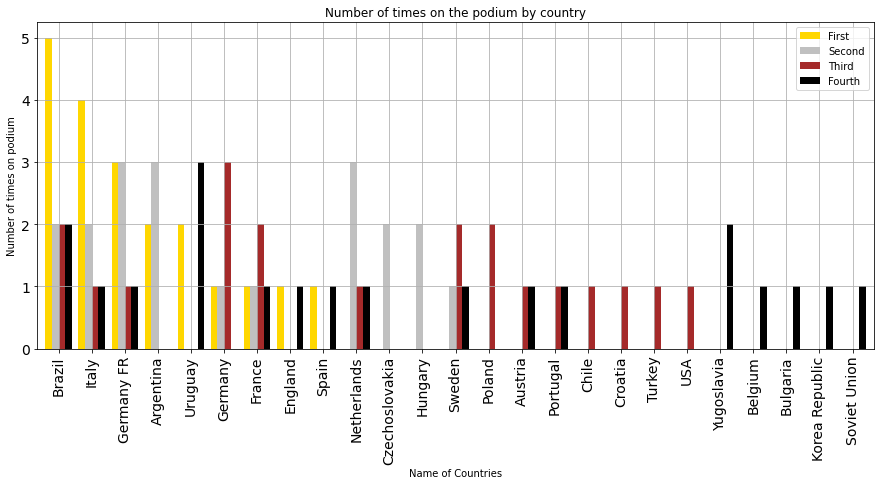

In [73]:
total_count.plot(y=['First', 'Second', 'Third', 'Fourth'], kind="bar", 
                  color =['gold','silver','brown', 'black'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.grid(True)
plt.xlabel('Name of Countries')
plt.ylabel('Number of times on podium')
plt.title('Number of times on the podium by country')



Text(0.5, 1.0, 'Number of times gold medal received by country')

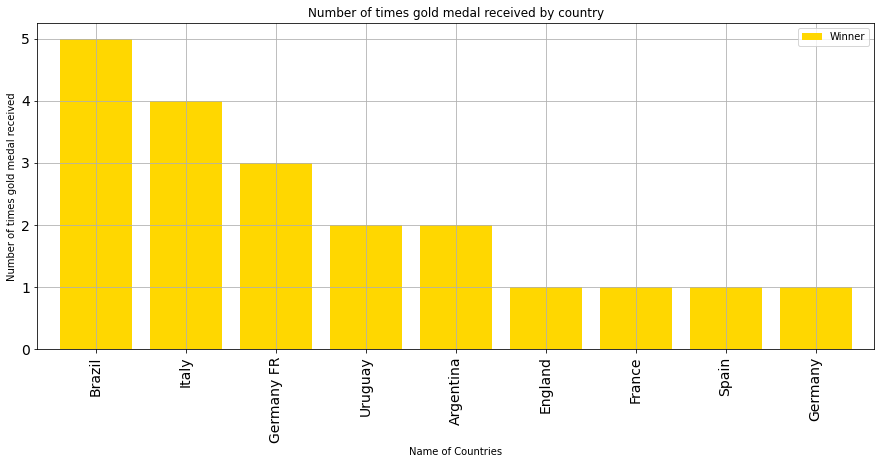

In [74]:
count_gold.plot(y='Winner', kind="bar", 
                  color =['gold'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.grid(True)
plt.xlabel('Name of Countries')
plt.ylabel('Number of times gold medal received')
plt.title('Number of times gold medal received by country')



In [68]:
import seaborn as sns
import numpy as np

/var/folders/x5/1wvwmrjs0836vb_9_01g75h40000gn/T/ipykernel_45423/3722713571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hy["type"] = "HOME TEAM"
/var/folders/x5/1wvwmrjs0836vb_9_01g75h40000gn/T/ipykernel_45423/3722713571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ay["type"] = "AWAY TEAM"
/Users/takaooba/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will

                         index  team
0                       Brazil    20
1                        Italy    18
2                    Argentina    16
3                       Mexico    15
4                      England    14
..                         ...   ...
78                       Wales     1
79                       Zaire     1
80                       Haiti     1
81                   German DR     1
82  rn">Bosnia and Herzegovina     1

[83 rows x 2 columns]


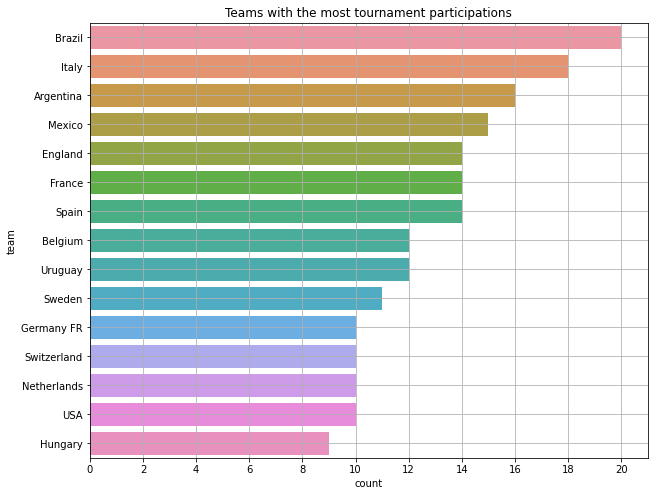

In [72]:

hy = fifa[["Year","Home Team Name"]]
hy.columns = ["year","team"]

hy["type"] = "HOME TEAM"
ay = fifa[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()
print(yt)
plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15], linewidth=1)


plt.grid(True)

plt.title("Teams with the most tournament participations",color='Black')
plt.ylabel("team")
plt.xlabel("count")
plt.xticks(np.arange(0,22,2))
plt.show()



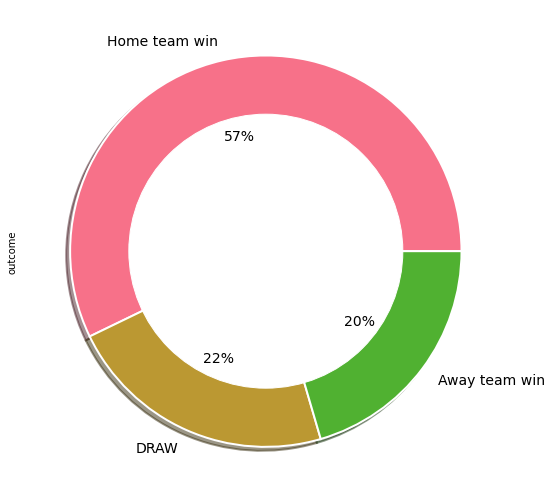

In [85]:
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

    
fifa["outcome"] = fifa.apply(lambda matches:label(matches),axis=1)
plt.figure(figsize=(9,9))
fifa["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)

fifa[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',"outcome"]]


def win_label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
def lst_label(matches):
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
fifa["win_team"]  = fifa.apply(lambda matches:win_label(matches),axis=1)
fifa["lost_team"] = fifa.apply(lambda matches:lst_label(matches),axis=1)
lst = fifa["lost_team"].value_counts().reset_index()
win = fifa["win_team"].value_counts().reset_index()
wl  = win.merge(lst,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]